## All countries except Norway

In [16]:
import glob
import shutil
from tqdm.notebook import tqdm
import random
import pandas as pd
import numpy as np


# converting to yolo annotation
import xml.etree.ElementTree as ET
import os
import json

In [17]:
# Suppress log messages and warnings
import warnings
import logging, sys
logging.disable(sys.maxsize)
warnings.filterwarnings('ignore')

In [18]:
"""Function for converting the dataset to YOLO format"""
def xml_to_yolo(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]

Next I want to retrieve all annotation files for all of the conuntries except Norway and do a check to see if the related images exists for the annotation (in case of mislabeled files etc..).

Further on I iterate through all files to retrieve all the labels in the dataset.

The annotation files and their related imgage file are finally added to a dataframe including the different detections in every image

In [19]:
"""Retrieves the path of all annotation files and adds them to a list"""
paths = glob.glob("./RDD2022_all_countries/[!Norway]*")

annot_list = []

for path in paths:
    path = f'{path}/train'
    ## Finding all the images and separating in training and validation
    annot_list += glob.glob(f'{path}/annotations/xmls/*.xml')

In [20]:
"""Iterates thorugh every file and see if both the annotation file and image exists"""

data = {'labels': [], 'images': []}

for idx, file in enumerate(tqdm(annot_list)):

    basename = os.path.basename(file)
    filename = os.path.splitext(basename)[0]

    # check if the label contains the corresponding image file

    image_dir = '/'.join(file.split('/')[:4])+'/images'
    image_file = os.path.join(image_dir, filename+'.jpg')
    if not os.path.exists(image_file):
        print(filename, 'image does not exist!')
        continue
        
    data['labels'].append(annot_list[idx])
    data['images'].append(image_file)

  0%|          | 0/30224 [00:00<?, ?it/s]

In [21]:
"""Files are added to a dataframe including information on which objects they contain and shuffled"""
classes = []

for idx, file in enumerate(tqdm(data['labels'])):

    # parse the content of the xml file
    tree = ET.parse(file)
    root = tree.getroot()
    
    for obj in root.findall('object'):
        label = obj.find("name").text
        # check for new classes and append to list
        if label not in classes:
            classes.append(label)
            data[label] = np.zeros(len(data['labels']), dtype=int)
        data[label][idx] += 1
        
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

df

  0%|          | 0/30224 [00:00<?, ?it/s]

,labels,images,D00,D10,D20,D40,Repair,Block crack,D50,D44,D43,D11,D01,D0w0
0,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,0,0,0,0,0,0,0,0,0,0
1,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,1,1,0,0,0,0,0,0,0,0
2,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,2,1,0,0,0,3,0,0,0,0
3,./RDD2022_all_countries/China_Drone/train/anno...,./RDD2022_all_countries/China_Drone/train/imag...,0,0,0,0,3,0,0,0,0,0,0,0
4,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30219,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,0,0,0,0,0,1,0,0,0,0
30220,./RDD2022_all_countries/Czech/train/annotation...,./RDD2022_all_countries/Czech/train/images/Cze...,0,0,0,0,0,0,0,0,0,0,0,0
30221,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,0,0,0,0,0,0,0,0,0,0
30222,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,1,2,0,0,0,0,0,0,0,0


In [22]:
"""Function for createing bar chart based on frequency"""
def plot_data(df):
    frequencies = df.mean(axis=0).sort_values()

    _ = frequencies.plot(title='Dataset for analyzing cracks', 
                         kind='barh', 
                         figsize=(12, 12),
                         color='#479EF8')

,labels,images,D00,D10,D20,D40,Repair,Block crack,D50,D44,D43,D11,D01,D0w0
0,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,0,0,0,0,0,0,0,0,0,0
1,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,1,1,0,0,0,0,0,0,0,0
2,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,2,1,0,0,0,3,0,0,0,0
3,./RDD2022_all_countries/China_Drone/train/anno...,./RDD2022_all_countries/China_Drone/train/imag...,0,0,0,0,3,0,0,0,0,0,0,0
4,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30219,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,0,0,0,0,0,1,0,0,0,0
30220,./RDD2022_all_countries/Czech/train/annotation...,./RDD2022_all_countries/Czech/train/images/Cze...,0,0,0,0,0,0,0,0,0,0,0,0
30221,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,0,0,0,0,0,0,0,0,0,0
30222,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,1,2,0,0,0,0,0,0,0,0


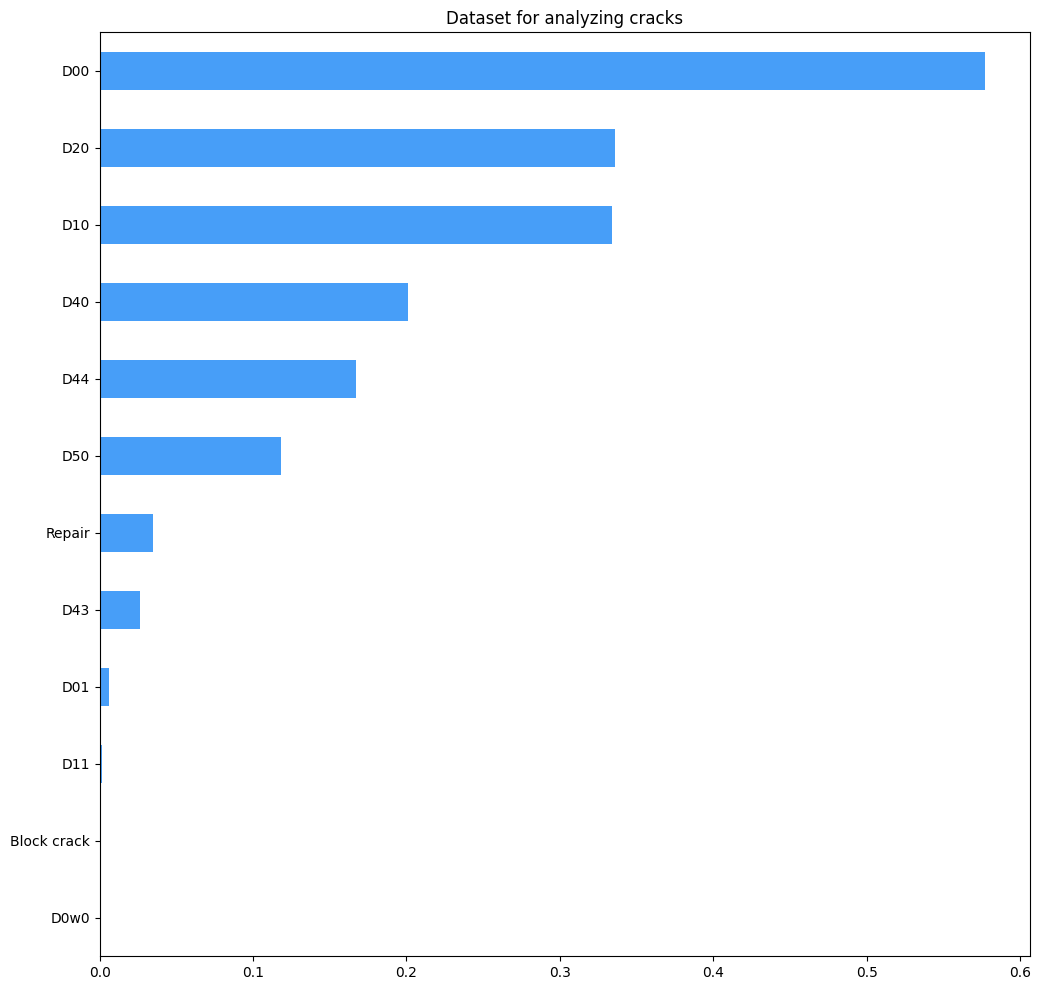

In [23]:
plot_data(df.iloc[:, 2:])

df

I just want the dataframe to contain the four classes: D00, D10, D20, D40. The rest are removed

In [24]:
classes_to_drop = ['D0w0', 'Block crack', 'D11', 'D01', 'D43', 'Repair', 'D50', 'D44']
df.drop(classes_to_drop, axis=1, inplace=True)
classes = [elem for elem in classes if elem not in classes_to_drop]

df

,labels,images,D00,D10,D20,D40
0,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,0,0
1,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,1,1
2,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,2,1
3,./RDD2022_all_countries/China_Drone/train/anno...,./RDD2022_all_countries/China_Drone/train/imag...,0,0,0,0
4,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,1,0,0,0
...,...,...,...,...,...,...
30219,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,0,0
30220,./RDD2022_all_countries/Czech/train/annotation...,./RDD2022_all_countries/Czech/train/images/Cze...,0,0,0,0
30221,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,0,0
30222,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,1,2


Because the dataset contains so many D00 objects, I want to remove many the rows which exclusively contains D00 detections from the dataset. This is done by creating a temporary dataframe containing the rows we want to remove

In [25]:
trim_df = df.loc[(df['D00'] == df[classes].sum(axis=1)) & (df['D00'] > 0)]

print("Number of D00 cracks in trim_df:", trim_df['D00'].sum())
print("Number of D00 cracks in df:", df['D00'].sum())

Number of D00 cracks in trim_df: 8812
Number of D00 cracks in df: 17446


The datfarame is sorted and sliced so that we remove the images with the most D00 detections in it.

In [26]:
trim_df = trim_df.sort_values(by=['D00'], ascending=False).reset_index(drop=True)
trim_df = trim_df.iloc[:3600, :]
print("Number of D00 detections in trimmer_df:", trim_df['D00'].sum())


trim_df

Number of D00 detections in trimmer_df: 6661


,labels,images,D00,D10,D20,D40
0,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,9,0,0,0
1,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,9,0,0,0
2,./RDD2022_all_countries/United_States/train/an...,./RDD2022_all_countries/United_States/train/im...,7,0,0,0
3,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,7,0,0,0
4,./RDD2022_all_countries/United_States/train/an...,./RDD2022_all_countries/United_States/train/im...,7,0,0,0
...,...,...,...,...,...,...
3595,./RDD2022_all_countries/China_Drone/train/anno...,./RDD2022_all_countries/China_Drone/train/imag...,1,0,0,0
3596,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,1,0,0,0
3597,./RDD2022_all_countries/United_States/train/an...,./RDD2022_all_countries/United_States/train/im...,1,0,0,0
3598,./RDD2022_all_countries/China_Drone/train/anno...,./RDD2022_all_countries/China_Drone/train/imag...,1,0,0,0


(26624, 6)
Number of D00 cracks detected: 10785
Number of D10 cracks detected: 10100
Number of D20 cracks detected: 10149
Number of D40 cracks detected: 6083


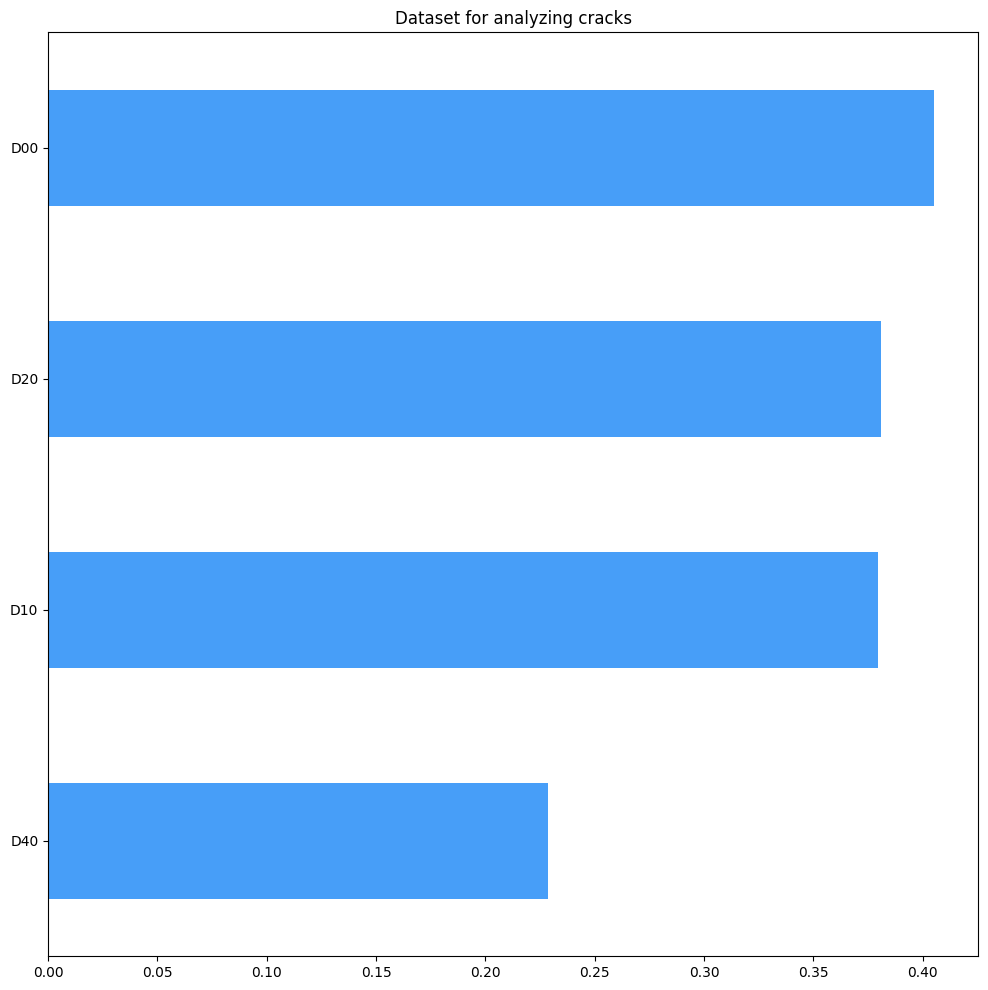

In [27]:
cond = df['labels'].isin(trim_df['labels'])
df.drop(df[cond].index, inplace = True)

df.reset_index(drop=True, inplace=True)

print(df.shape)
print("Number of D00 cracks detected:", df['D00'].sum())
print("Number of D10 cracks detected:", df['D10'].sum())
print("Number of D20 cracks detected:", df['D20'].sum())
print("Number of D40 cracks detected:", df['D40'].sum())
plot_data(df[2:])

Because of removing a lot of classes the dataframe contains a lot of images with no objects in it. These are removed from the dataframe.

In [28]:
#Removing rows where there are no detectinos
df = df.loc[df[classes].sum(axis=1) != 0]
df.reset_index(drop=True, inplace=True)
print("Shape of dataframe after removing 'zero rows'", df.shape)

Shape of dataframe after removing 'zero rows' (17253, 6)


The data is then split in two, where 75% of the data is used for training and 25% for validation

In [29]:
import numpy as np

split_data = []

for idx, row in tqdm(df.iterrows()):
    if idx <= df.shape[0]*0.75:
        split_data.append('train')
    else:
        split_data.append('val')

        
df['split'] = split_data

df.reset_index(drop=True, inplace=True)

df

0it [00:00, ?it/s]

,labels,images,D00,D10,D20,D40,split
0,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,0,0,1,1,train
1,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,2,1,train
2,./RDD2022_all_countries/United_States/train/an...,./RDD2022_all_countries/United_States/train/im...,1,0,0,0,train
3,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,2,0,train
4,./RDD2022_all_countries/United_States/train/an...,./RDD2022_all_countries/United_States/train/im...,2,0,1,0,train
...,...,...,...,...,...,...,...
17248,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,1,0,val
17249,./RDD2022_all_countries/Czech/train/annotation...,./RDD2022_all_countries/Czech/train/images/Cze...,0,0,2,1,val
17250,./RDD2022_all_countries/India/train/annotation...,./RDD2022_all_countries/India/train/images/Ind...,1,0,0,0,val
17251,./RDD2022_all_countries/Japan/train/annotation...,./RDD2022_all_countries/Japan/train/images/Jap...,0,0,1,2,val


In [30]:
os.makedirs('./dataset/train/images')
os.makedirs('./dataset/train/labels')
os.makedirs('./dataset/val/images')
os.makedirs('./dataset/val/labels')

Now all the annotations and images contained in the dataframe are parsed and formatted to yolo format ready for training.

In [31]:
for idx, row in tqdm(df.iterrows()):
    
    annotation = row['labels']
    image = row['images']
    
    result = []

    # parse the content of the xml file
    tree = ET.parse(annotation)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        label = obj.find("name").text
        if label in classes_to_drop:
            continue
        index = classes.index(label)
        pil_bbox = [int(float(x.text)) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo(pil_bbox, width, height)
        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")
        

    if result:
        
        if row['split'] == 'train':
            dest = 'dataset/train'
        else:
            dest = 'dataset/val'
        
        
        # generate a YOLO format text file for each xml file
        with open(dest+'/labels/'+str(idx).zfill(6)+'.txt', 'w') as f:
            f.write('\n'.join(result))
            
        # moving images
        shutil.copy(
            image,
            dest+'/images/'+str(idx).zfill(6)+'.jpg'
        )
        
# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))

0it [00:00, ?it/s]

Below are some exampels to see if the images and annotations are correct

In [32]:
import cv2
import matplotlib.pyplot as plt

def plot_bounding_box(image_path):
    img = cv2.imread(image_path)
    dh, dw, _ = img.shape

    split_string = image_path.split('/')
    

    
    label_path = '/'.join((split_string[:2]))+'/labels/'+split_string[3].split('.')[0]+'.txt'
    fl = open(label_path, 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

    plt.imshow(img)
    plt.show()



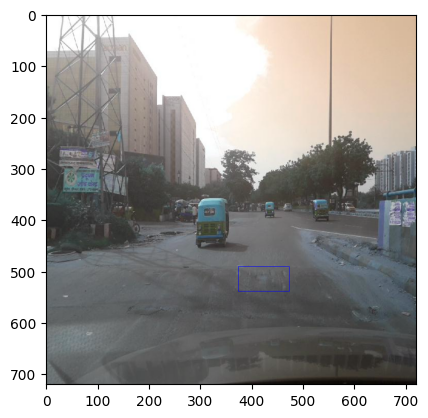

In [33]:
plot_bounding_box('dataset/train/images/002135.jpg')

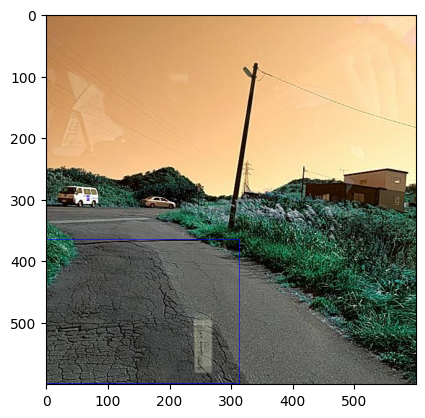

In [34]:
plot_bounding_box('dataset/train/images/011110.jpg')

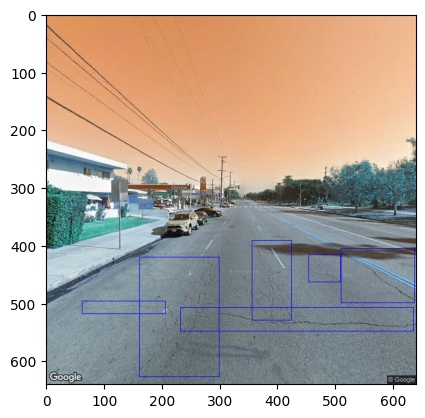

In [35]:
plot_bounding_box('dataset/train/images/012410.jpg')

## Data exploration for Norway

In [36]:
annot_list = glob.glob('./RDD2022_all_countries/Norway/train/annotations/xmls/*.xml')

Same as above, iterating through all the countries to see if all the annotations have a relating image

In [37]:
data = {'labels': [], 'images': []}

for idx, file in enumerate(tqdm(annot_list)):

    basename = os.path.basename(file)
    filename = os.path.splitext(basename)[0]

    # check if the label contains the corresponding image file

    image_dir = '/'.join(file.split('/')[:4])+'/images'
    image_file = os.path.join(image_dir, filename+'.jpg')
    
    if not os.path.exists(image_file):
        print(filename, 'image does not exist!')
        continue
        
    data['labels'].append(annot_list[idx])
    data['images'].append(image_file)

  0%|          | 0/8161 [00:00<?, ?it/s]

For the finetuning I wanted to keep some images without objects in it to reduce the chance of false positives for the testing. I therefore created a column keeping track of which rows that have no objects in it

In [38]:
classes = []

data["Empty"] = np.zeros(len(annot_list), dtype=int)
for idx, file in enumerate(tqdm(data['labels'])):

    # parse the content of the xml file
    tree = ET.parse(file)
    root = tree.getroot()
    
    objects = root.findall('object')
    if objects:
        for obj in objects:
            label = obj.find("name").text
            # check for new classes and append to list
            if label not in classes:
                classes.append(label)
                data[label] = np.zeros(len(data['labels']), dtype=int)
            data[label][idx] += 1
    else:
        label = "Empty"
        data[label][idx] += 1
        
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

df

  0%|          | 0/8161 [00:00<?, ?it/s]

,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,2,0,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,2,0,0,0
...,...,...,...,...,...,...,...
8156,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8157,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8158,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8159,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0


In [39]:
classes = ["D00", "D10", "D20", "D40"]

Plotting the data to see the distribution refernced by the objects

,labels,images,Empty,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,2,0,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,2,0,0,0
...,...,...,...,...,...,...,...
8156,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8157,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8158,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,0,0,0,0
8159,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,0,1,0


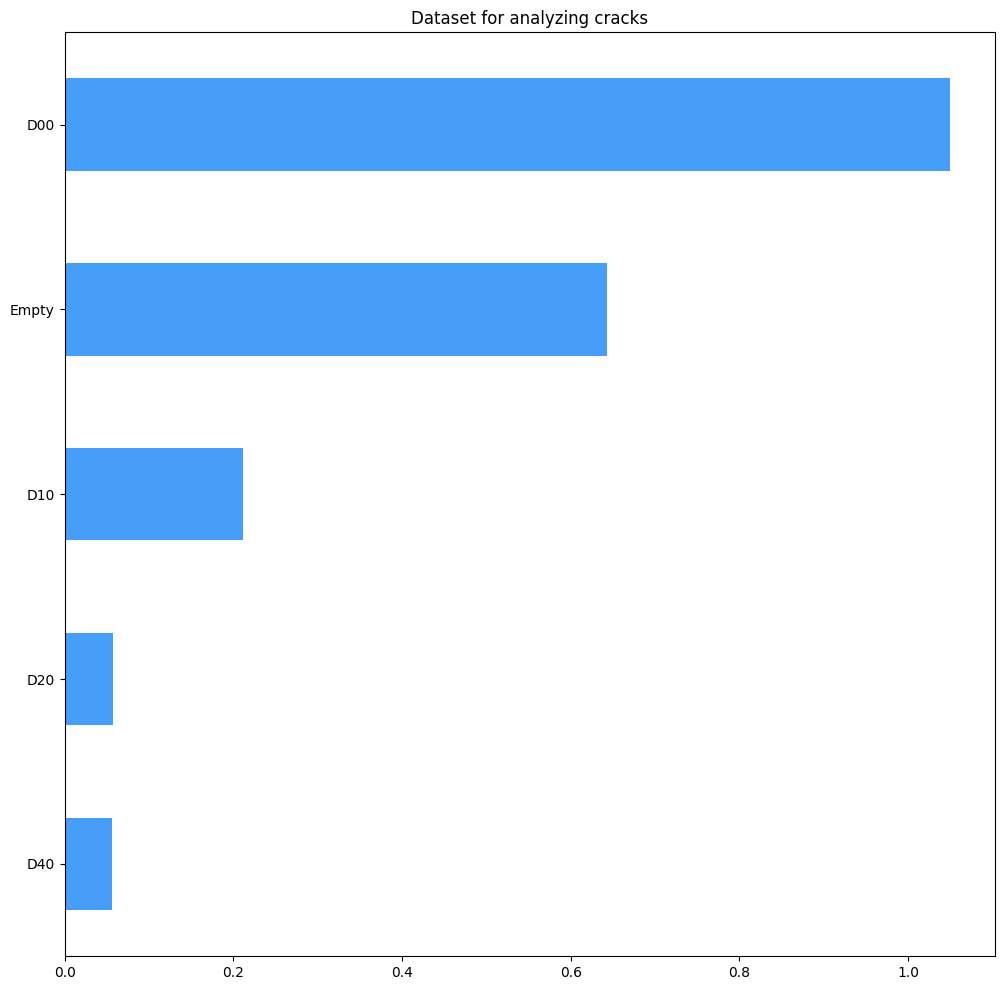

In [40]:
plot_data(df.iloc[:, 2:])

df

Same as above I want to remove rows exlusively containing the D00 objects

In [41]:
trim_df = df.loc[(df['D00'] == df[classes].sum(axis=1)) & (df['D00'] > 0)]

print("Number of D00 cracks in trim_df:", trim_df['D00'].sum())
print("Number of D00 cracks df:", df['D00'].sum())

Number of D00 cracks in trim_df: 3796
Number of D00 cracks df: 8570


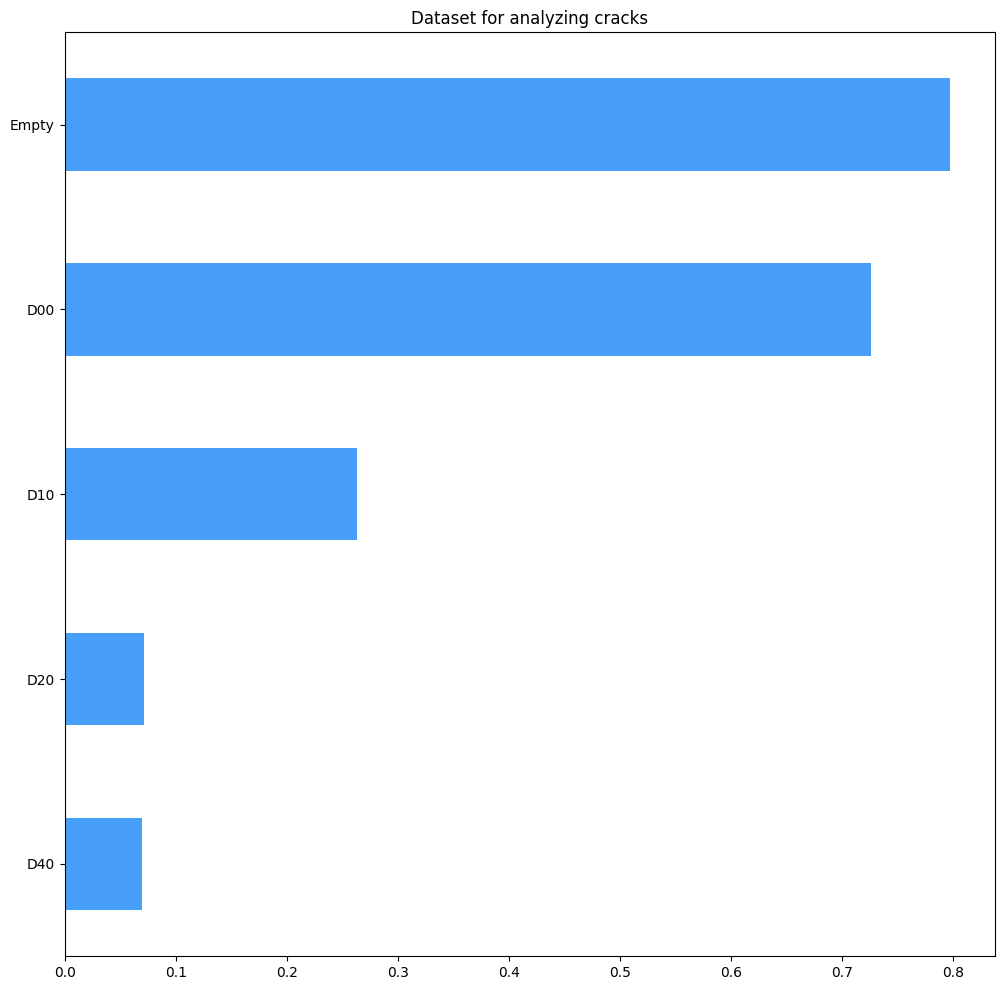

In [42]:
cond = df['labels'].isin(trim_df['labels'])
df.drop(df[cond].index, inplace = True)
df.reset_index(drop=True, inplace=True)

plot_data(df[2:])

The amount of D00 objects have been decrased but the dataset is still very unbalanced. Therefore trying to remove 200 images containing the most D00 detections in it to see how this will effect the results

Number of D00 detections before processing: 4774
Number of D10 detections before processing: 1730
Number of D20 detections before processing: 468
Number of D40 detections before processing: 461 

Number of D00 detections after processing: 2363
Number of D10 detections after processing: 1289
Number of D20 detections after processing: 350
Number of D40 detections after processing: 421


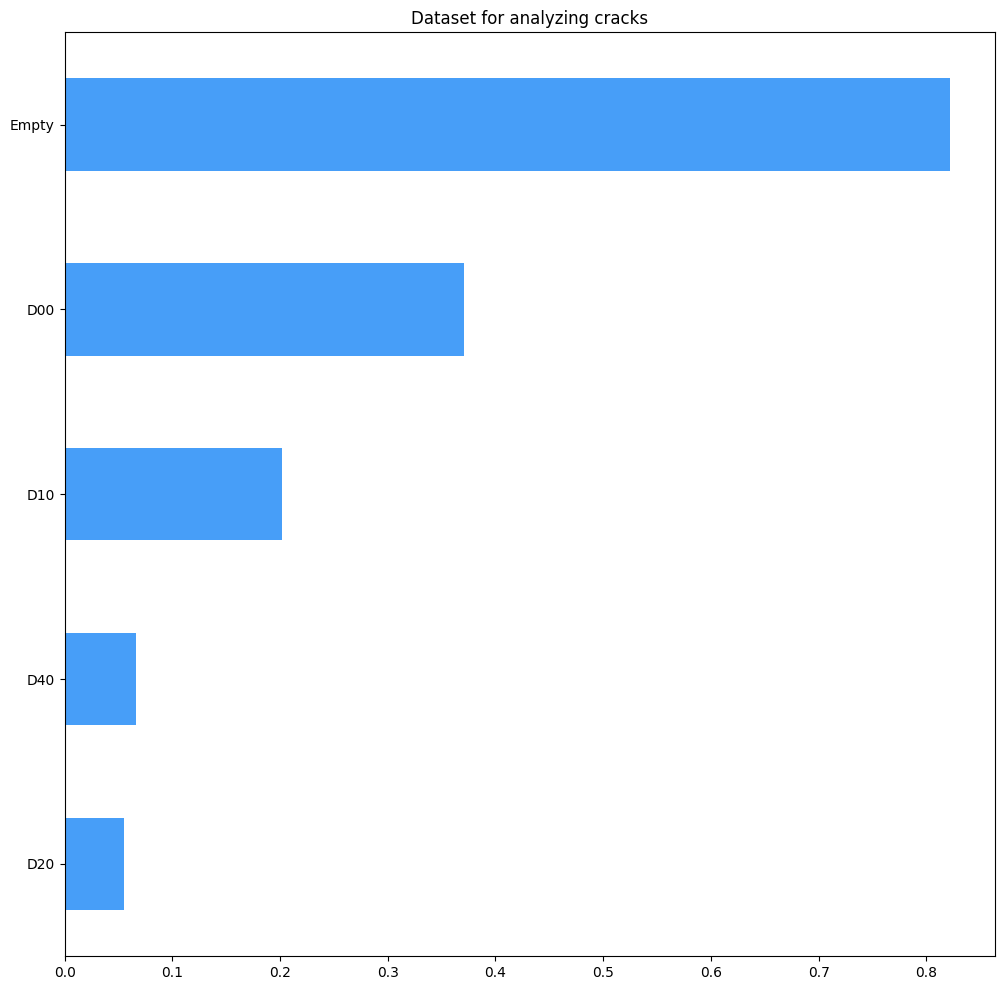

In [43]:

print("Number of D00 detections before processing:", df['D00'].sum())
print("Number of D10 detections before processing:", df['D10'].sum())
print("Number of D20 detections before processing:", df['D20'].sum())
print("Number of D40 detections before processing:", df['D40'].sum(), "\n")


tmp_df = df.loc[(df["D00"] != 0)]
tmp_df = tmp_df.sort_values(by=["D00"], ascending=False)
tmp_df.reset_index(drop=True, inplace=True)
tmp_df = tmp_df.iloc[:200, :]

cond = df['labels'].isin(tmp_df['labels'])
df.drop(df[cond].index, inplace = True)

print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())
print("Number of D20 detections after processing:", df['D20'].sum())
print("Number of D40 detections after processing:", df['D40'].sum())


plot_data(df[2:])

Still there are very low amount of D20 objects and D40 objects in the dataset. Trying to isolate these two columns by seelcting all rows only containing these objects and sort them and append a slice of this data with most detections to the original dataframe

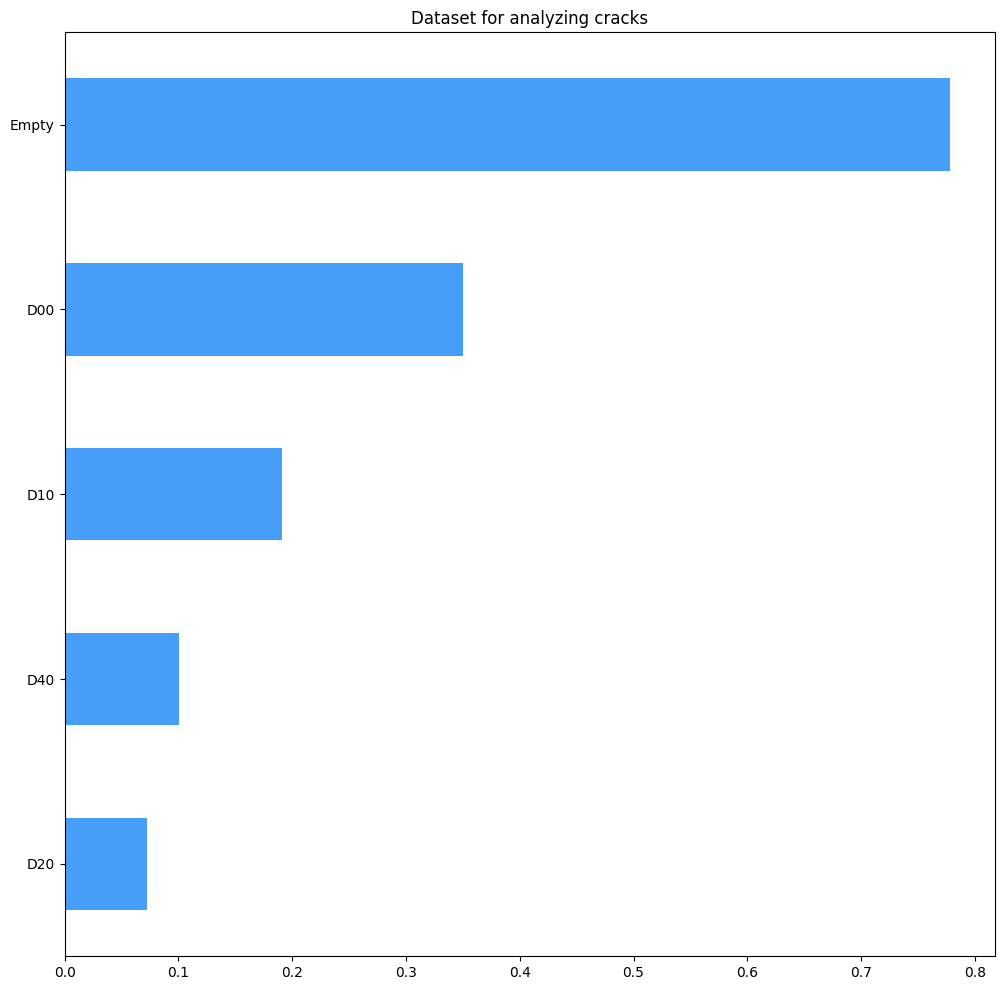

In [44]:
tmp_df = df.loc[(df["D00"] == 0) & (df["Empty"] == 0) & (df["D10"] == 0)]
tmp_df = tmp_df.sort_values(['D40', 'D20'],
              ascending = [True, False])

df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])

plot_data(df)

Doing this may cause overfitting on those images being copied over. However, because of data augmentation will reduce this because the images will be transformed every time an image is loaded in yolo.

Number of images with no objects is too hight, therefore I will remove many of them from the dataframe, but keep some to reduce the chance of false positives. In addition removing the class "Empty" because this will not be one of the prediction classes

,labels,images,D00,D10,D40,D20
0,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,1,2,0,0
1,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0
2,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,2,0,1,0
3,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0
4,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,1,0,0
...,...,...,...,...,...,...
2036,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,1,0
2037,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,1,0
2038,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,1,0
2039,./RDD2022_all_countries/Norway/train/annotatio...,./RDD2022_all_countries/Norway/train/images/No...,0,0,2,0


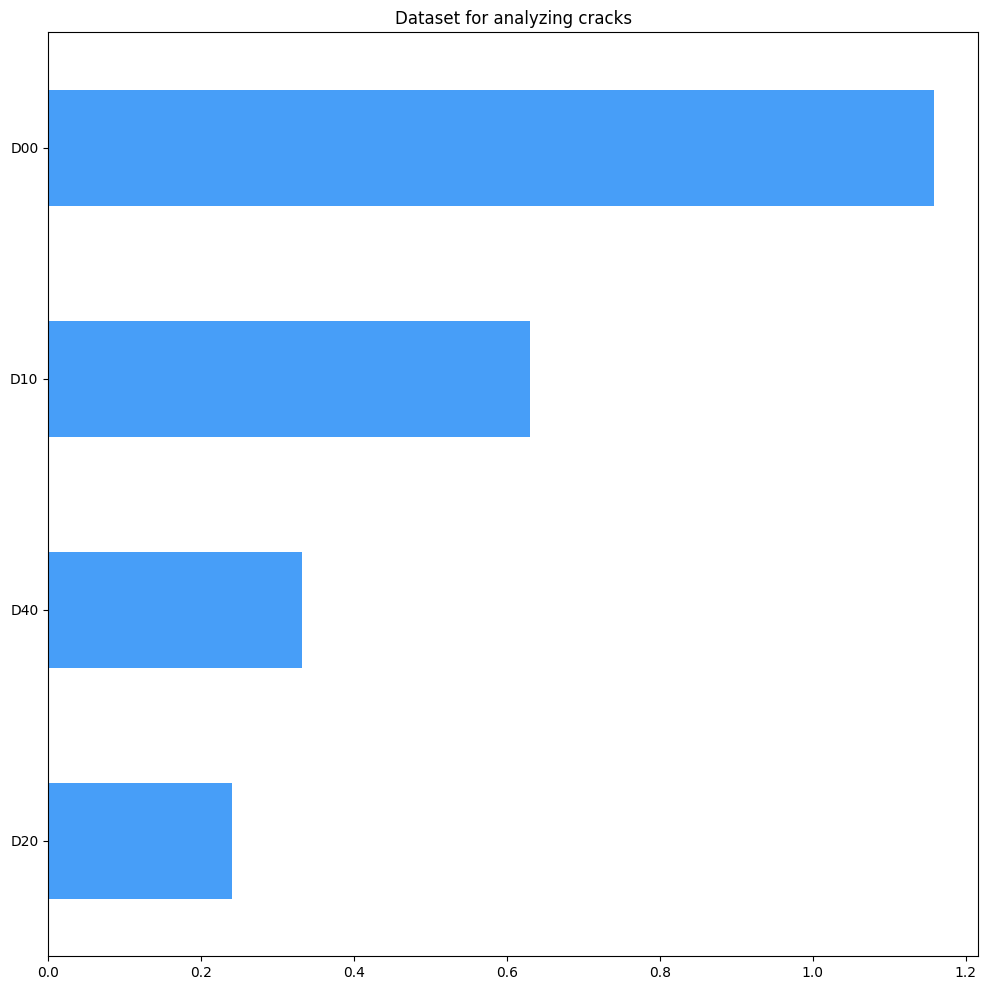

In [45]:
tmp_df = df.loc[df["Empty"] == 1]

tmp_df = tmp_df.iloc[:4700, :]
tmp_df.reset_index(drop=True, inplace=True)
cond = df['labels'].isin(tmp_df['labels'])
df.drop(df[cond].index, inplace = True)
df.drop(columns=["Empty"], inplace=True)
df.reset_index(drop=True, inplace=True)

plot_data(df[2:])
df

As above, splitting the data into training and validation

In [46]:
import numpy as np

split_data = []

for idx, row in tqdm(df.iterrows()):
    if idx <= df.shape[0]*0.75:
        split_data.append('train')
    else:
        split_data.append('val')

        
df['split'] = split_data

0it [00:00, ?it/s]

In [47]:
os.makedirs('./dataset_finetuned/train/images')
os.makedirs('./dataset_finetuned/train/labels')
os.makedirs('./dataset_finetuned/val/images')
os.makedirs('./dataset_finetuned/val/labels')

In [48]:
for idx, row in tqdm(df.iterrows()):
    
    annotation = row['labels']
    image = row['images']
    
    result = []

    # parse the content of the xml file
    tree = ET.parse(annotation)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    
    objects = root.findall('object')
    if objects:
        for obj in objects:
            label = obj.find("name").text
            index = classes.index(label)
            pil_bbox = [int(float(x.text)) for x in obj.find("bndbox")]
            yolo_bbox = xml_to_yolo(pil_bbox, width, height)
            # convert data to string
            bbox_string = " ".join([str(x) for x in yolo_bbox])
            result.append(f"{index} {bbox_string}")
    else:
        result.append('')
        

    if result:
        if row['split'] == 'train':
            dest = 'dataset/train'
        else:
            dest = 'dataset/val'
        
        
        # generate a YOLO format text file for each xml file
        with open(dest+'/labels/'+str(idx).zfill(6)+'.txt', 'w') as f:
            f.write('\n'.join(result))
            
        # moving images
        shutil.copy(
            image,
            dest+'/images/'+str(idx).zfill(6)+'.jpg'
        )
        
# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))

0it [00:00, ?it/s]

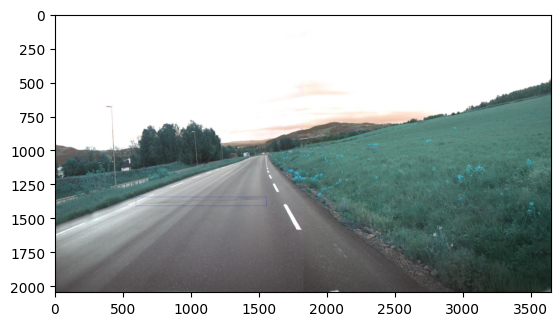

In [49]:
plot_bounding_box('dataset/train/images/000015.jpg')

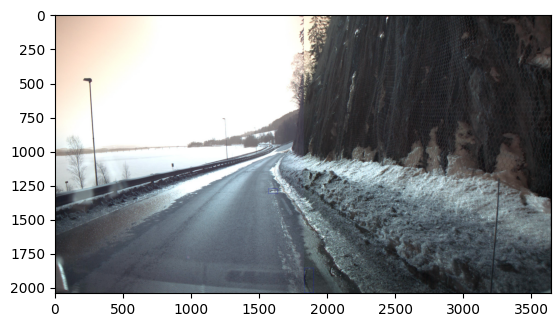

In [50]:
plot_bounding_box('dataset/train/images/000028.jpg')

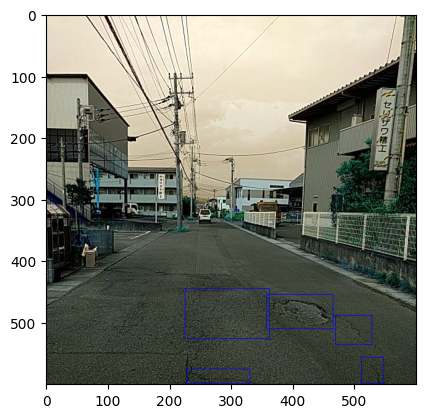

In [51]:
plot_bounding_box('dataset/train/images/002008.jpg')